In [1]:
suppressWarnings(suppressPackageStartupMessages({
    library(tidyverse)
    library(data.table)
}))


In [2]:
source('paths.sh')


In [3]:
traits_w_metrics_f %>%
fread() %>%
rename_with(
    function(x){str_replace(x, '#', '')}, starts_with("#")
) -> traits_w_metrics_df

In [4]:
'/oak/stanford/groups/mrivas/users/ytanigaw/repos/rivas-lab/PRS/data/traits.tsv' %>%
fread() %>%
rename_with(function(x){str_replace(x, '#', '')}, starts_with("#")) -> traits_2020_df


In [7]:
traits_2020_df %>% dim %>% print
traits_w_metrics_df %>% dim %>% print

[1] 1617   11
[1] 1565   13


In [10]:
setdiff(traits_w_metrics_df$trait, traits_2020_df$trait) 

[1] "INI30500"

In [22]:
traits_w_metrics_df %>%
inner_join(
    traits_2020_df %>%
    select(
        -trait_category, -trait_name, -family, -is_significant_in_WB
    ) %>%
    rename(
        'WBtest_P'='WB_test_P',
        "pred_geno"="geno",
        "pred_covar"="covar",
        "pred_full"="geno_covar",
        "pred_delta"="geno_delta"
    ),
    by="trait",
    suffix=c('', '.2020')
) -> joined_df


In [24]:
joined_df %>% nrow

[1] 1564

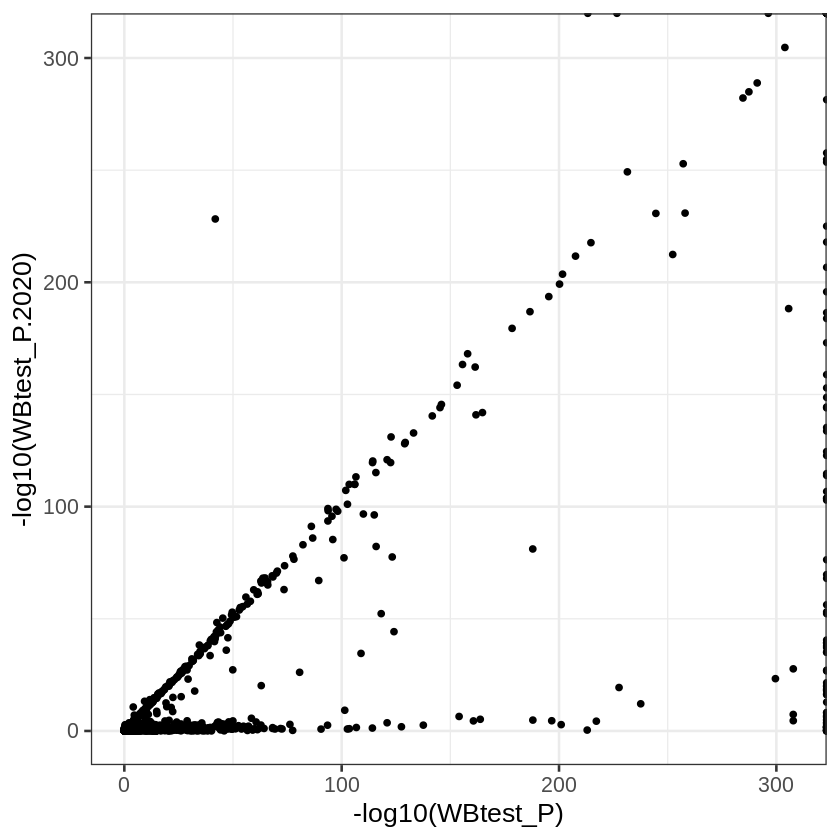

In [23]:
joined_df %>%
ggplot(aes(x = -log10(WBtest_P), y=-log10(WBtest_P.2020))) +
geom_point() +
theme_bw(base_size=16)

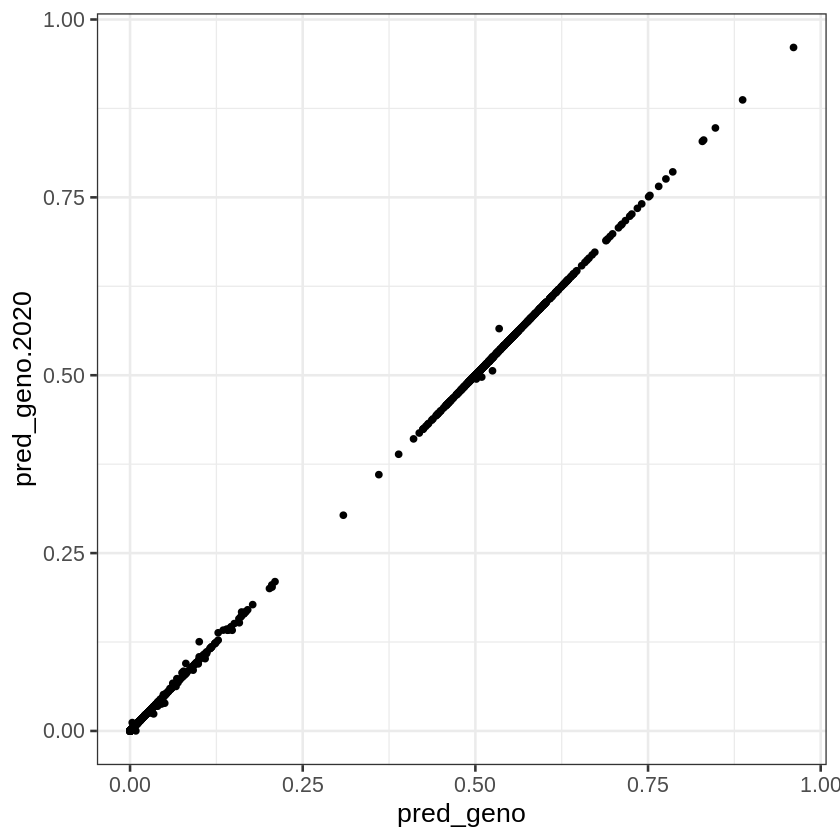

In [25]:
joined_df %>%
ggplot(aes(x = pred_geno, y=pred_geno.2020)) +
geom_point() +
theme_bw(base_size=16)

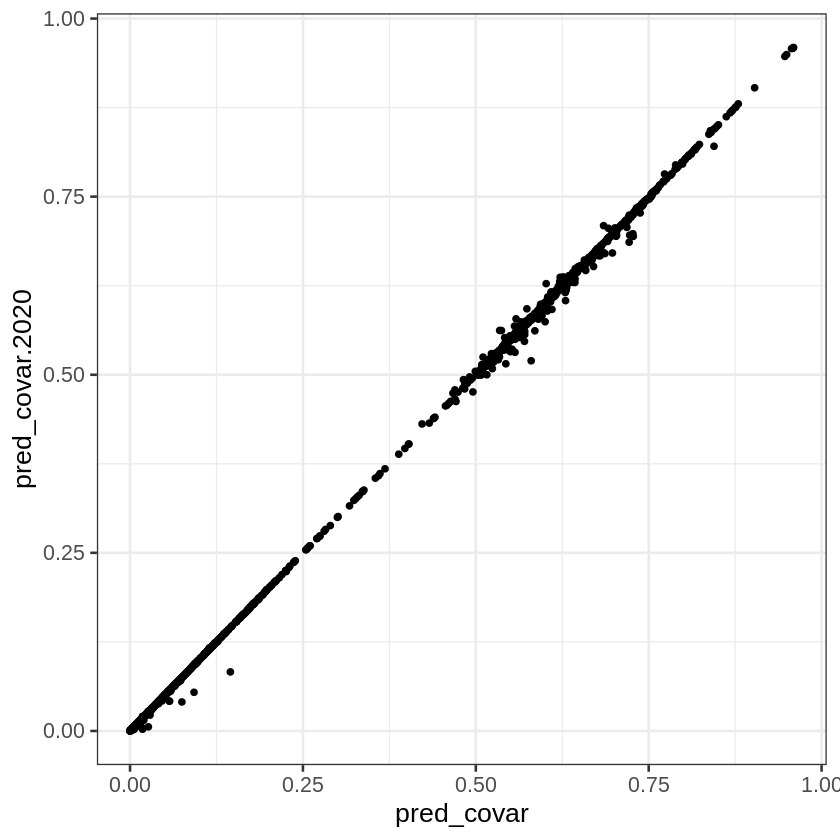

In [26]:
joined_df %>%
ggplot(aes(x = pred_covar, y=pred_covar.2020)) +
geom_point() +
theme_bw(base_size=16)

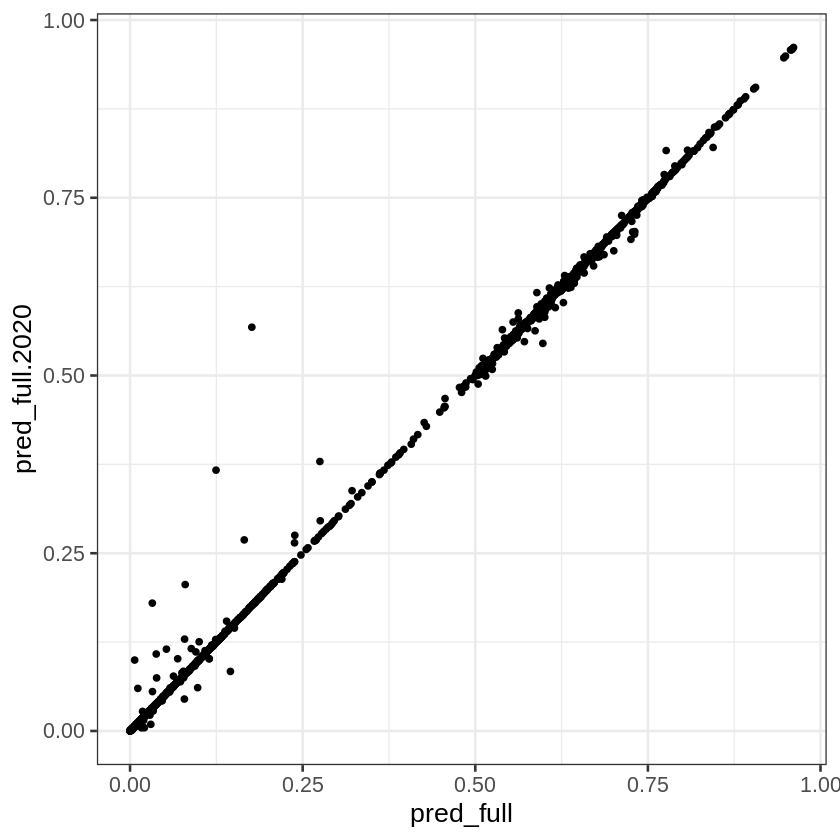

In [27]:
joined_df %>%
ggplot(aes(x = pred_full, y=pred_full.2020)) +
geom_point() +
theme_bw(base_size=16)

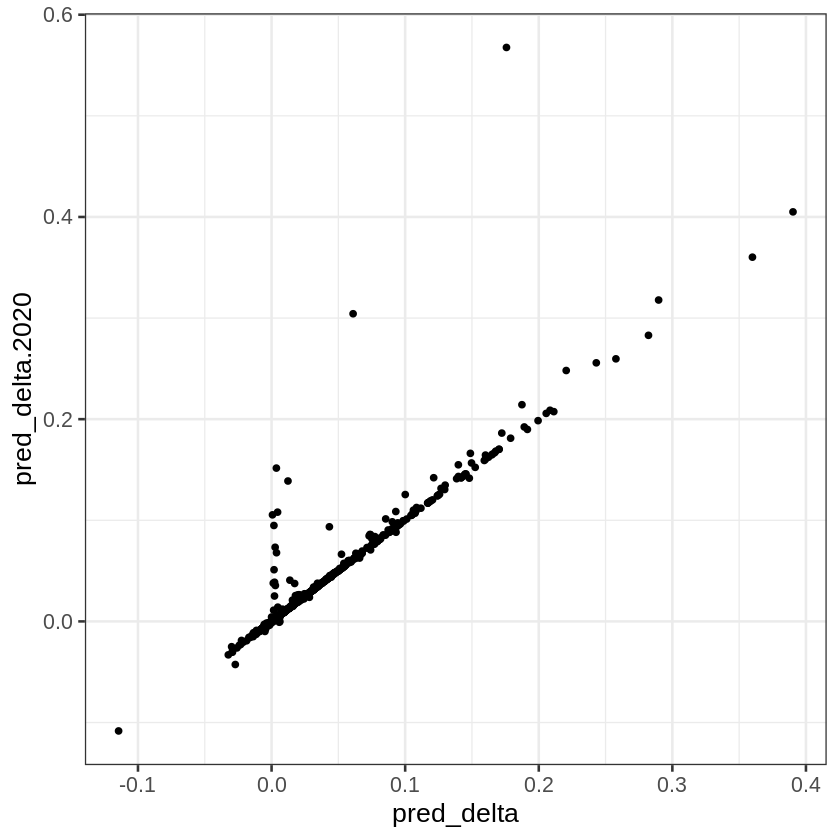

In [28]:
joined_df %>%
ggplot(aes(x = pred_delta, y=pred_delta.2020)) +
geom_point() +
theme_bw(base_size=16)